In [60]:
# 导入模块
import pandas as pd
import numpy as np
from sklearn import ensemble, preprocessing, metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.utils import shuffle
import math
import matplotlib.pyplot as plt
import random
import time

In [61]:
# 取经纬度的近似值

def appro(x):
    return round(x, 2)

In [62]:
# 处理weather数据集
def weather_process(dataframe):
    dataframe = dataframe.drop('CodeSum', axis=1)
    dataframe = dataframe.drop('StnPressure', axis=1)
    dataframe = dataframe.drop('SeaLevel', axis=1)
    dataframe = dataframe.drop('PrecipTotal', axis=1)
    dataframe = dataframe.drop('Water1', axis=1)
    dataframe = dataframe.drop('Depth', axis=1)
    weather_stn1 = dataframe[dataframe['Station'] == 1]
    weather_stn2 = dataframe[dataframe['Station'] == 2]
    weather_stn1 = weather_stn1.drop('Station', axis=1)
    weather_stn2 = weather_stn2.drop('Station', axis=1)
    dataframe = weather_stn1.merge(weather_stn2, on='Date')
    dataframe = dataframe.replace('-', -1)
    dataframe = dataframe.replace('M', -1)
    dataframe = dataframe.replace('  T', -1)
    return dataframe

In [63]:
# 处理train，test数据集
def train_process(dataframe):
    dataframe['Month'] = dataframe.Date.apply(create_month)
    dataframe['Day'] = dataframe.Date.apply(create_day)
    dataframe['Lat_appro'] = dataframe.Latitude.apply(appro)
    dataframe['Long_appro'] = dataframe.Longitude.apply(appro)
    dataframe = dataframe.drop(['Address', 'Block', 'Street'], axis=1)
    return dataframe

In [64]:
# 分割日期数据

def create_month(x):
    return x.split('-')[1]

def create_day(x):
    return x.split('-')[2]

In [65]:
# 使用数据集
train0 = pd.read_csv('train.csv')
weather = pd.read_csv('weather.csv')
tot = train0.shape[0]
# DataFrame 是一个表格型的数据结构，它含有一组有序的列，每列可以是不同的值类型（数值、字符串、布尔型值）。
# DataFrame 既有行索引也有列索引，它可以被看做由 Series 组成的字典（共同用一个索引）。

In [66]:
# 预处理数据，将标签编码，得到物种、位置以及陷阱对应的编码值

def encode_data(dataframe):
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(train0['Species'].values))
    dataframe['Species'] = lbl.transform(dataframe['Species'].values)
    lbl.fit(list(train0['Trap'].values))
    dataframe['Trap'] = lbl.transform(dataframe['Trap'].values)
    lbl.fit(list(train0['AddressNumberAndStreet'].values))
    dataframe['AddressNumberAndStreet'] = lbl.transform(dataframe['AddressNumberAndStreet'].values)
    return dataframe

In [67]:
# 根据日期将天气数据与训练集测试集合并

def join_process(data, weather):
    data = data.merge(weather, on='Date')
    data = data.drop(['Date'], axis=1)
    return data

In [68]:
# 剔除坏数据，切片得到有效数据

def slice_data(dataframe):
    label = dataframe.WnvPresent.values
    train = dataframe.drop(['WnvPresent'], axis=1)
    return [train,label]

In [69]:
def drawRoc (fpr,tpr):
    plt.subplots(figsize=(7,5.5))
    plt.plot(fpr,tpr,color='darkorange', lw =2)
    plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('RoC Curve')
    plt.legend(loc="lower right")
    plt.show()

In [70]:
def solve(sz,train0):
    shit2=float(0)
    shit3=float(0)
    for i in range (0,3,1):
        train0=shuffle(train0)
        train = train0[:sz].copy()
        test = train0[sz+1:].copy()
        train = slice_data(encode_data(join_process(train_process(train), weather_process(weather))))
        test = slice_data(encode_data(join_process(train_process(test), weather_process(weather))))
        # 训练随机森林模型

        e = time.time()
        clf = ensemble.RandomForestClassifier(n_jobs=-1, n_estimators=1000, min_samples_split=50)
        #add train[0] x_train, train[1] y_training

        fit = clf.fit(train[0], train[1])
        y_score = clf.fit(train[0], train[1]).predict_proba(test[0])
        #add
        s = time.time()
        print(clf.classes_)
        print('training time: '+str(s-e) + 's')
        fpr, tpr, thresholds = roc_curve(test[1],y_score[:,1])
        #AUC
        predictions = clf.predict_proba(test[0])[:,1]
        #test[0] xtest test[1] ytest
        shit2 = shit2 + roc_auc_score(test[1], predictions, multi_class='ovo')
        
        #准确率
        predictions = clf.predict(test[0])
        shit3 = shit3 + metrics.accuracy_score(test[1], predictions)
        
        drawRoc(fpr,tpr)
    
    shit2=shit2/3
    shit3=shit3/3
    return shit2,shit3

[0 1]
training time: 8.078751802444458s


No handles with labels found to put in legend.


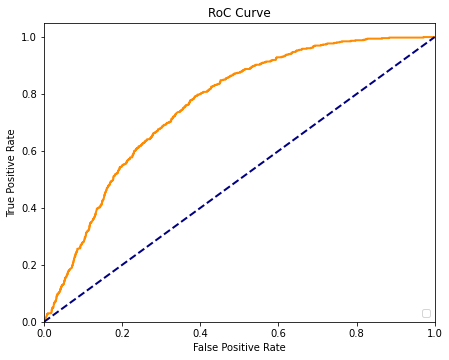

[0 1]
training time: 7.315183162689209s


No handles with labels found to put in legend.


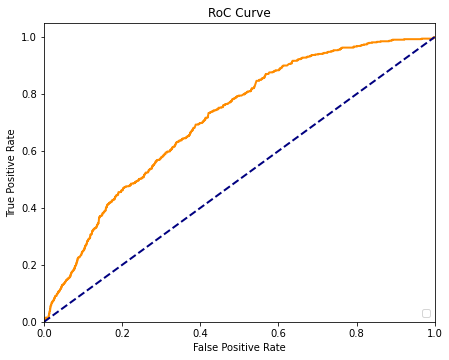

[0 1]
training time: 7.648097515106201s


No handles with labels found to put in legend.


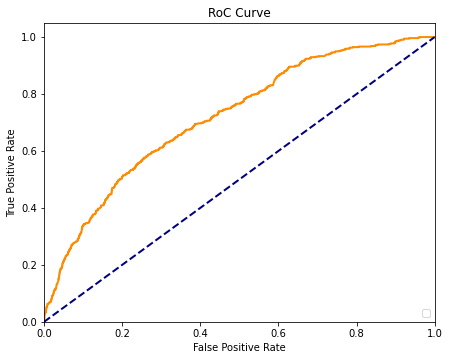

[0 1]
training time: 7.999351501464844s


No handles with labels found to put in legend.


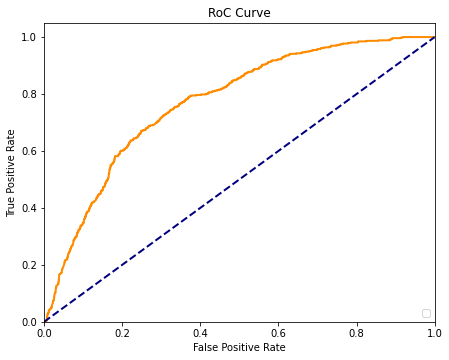

[0 1]
training time: 7.455751180648804s


No handles with labels found to put in legend.


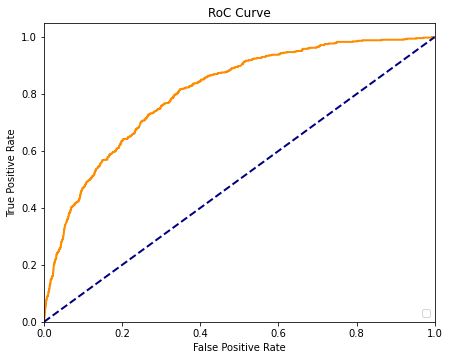

[0 1]
training time: 7.960559129714966s


No handles with labels found to put in legend.


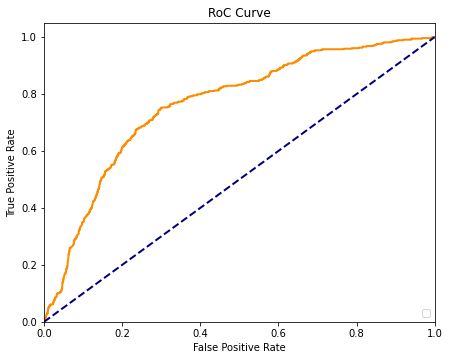

[0 1]
training time: 8.59056806564331s


No handles with labels found to put in legend.


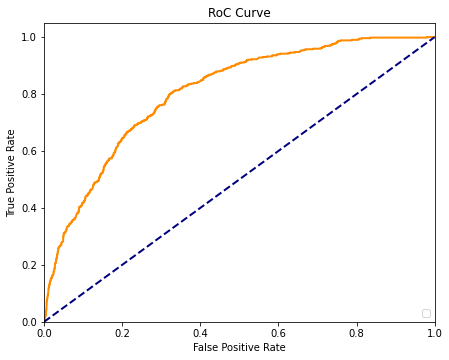

[0 1]
training time: 8.069411754608154s


No handles with labels found to put in legend.


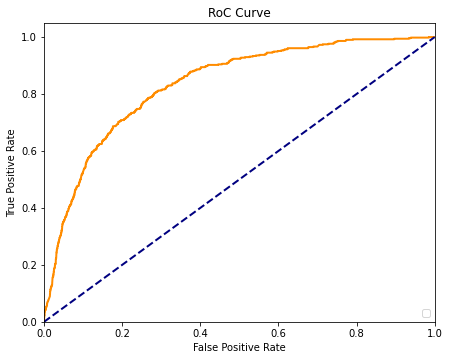

[0 1]
training time: 8.495441198348999s


No handles with labels found to put in legend.


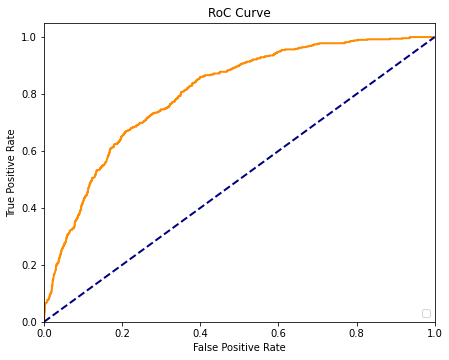

[0 1]
training time: 8.501075506210327s


No handles with labels found to put in legend.


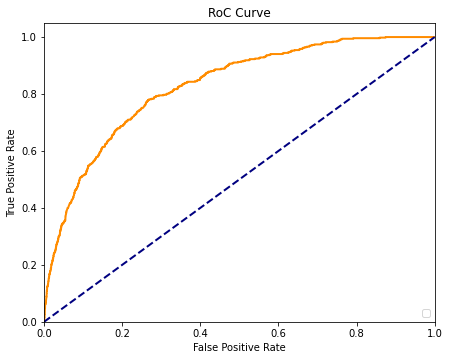

[0 1]
training time: 8.559776306152344s


No handles with labels found to put in legend.


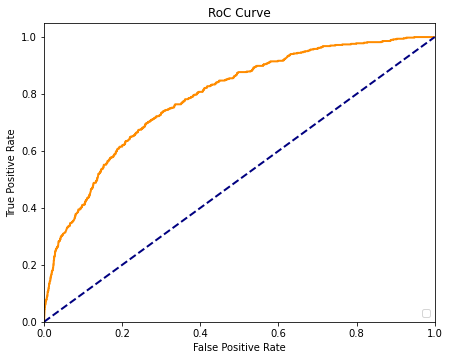

[0 1]
training time: 8.094884872436523s


No handles with labels found to put in legend.


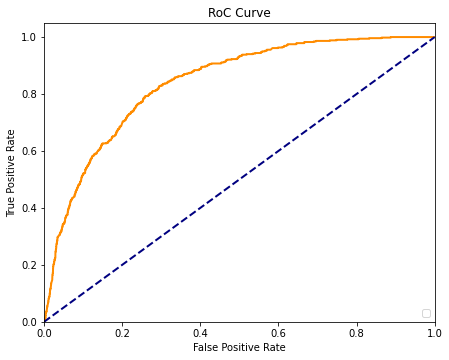

[0 1]
training time: 8.667526721954346s


No handles with labels found to put in legend.


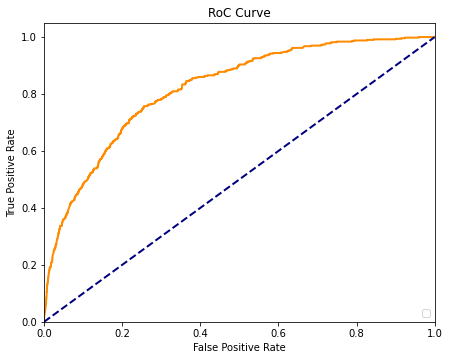

[0 1]
training time: 8.496225595474243s


No handles with labels found to put in legend.


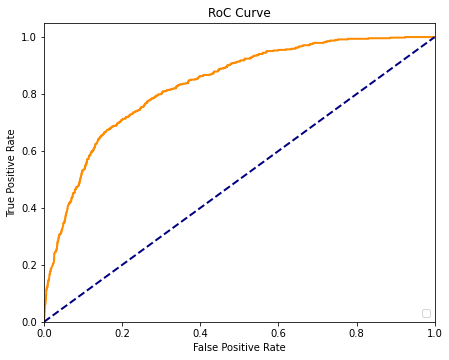

KeyboardInterrupt: 

In [71]:
num=0
xax = []
yauc = []
yacc = []
for j in range(1,49):
    num+=1
    auc,acc = solve( int(tot*num/50),train0 )
    xax.append(num/20)
    yauc.append(auc)
    yacc.append(acc)

In [ ]:
plt.plot(xax,yacc)
plt.show()



In [ ]:
plt.plot(xax,yauc)
plt.show()